In [ ]:
# ✅ STEP 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# ✅ STEP 2: Load the dataset
df = pd.read_csv('/content/adult.csv')  # Make sure your file is uploaded in Colab

# ✅ STEP 3: Display the first few rows to confirm it loaded correctly
df.head()
# ✅ STEP 4: Split the dataset — 80% train, 20% test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# ✅ STEP 5: Print the shapes to confirm split
print(f"Train set size: {train_df.shape}")
print(f"Test set size: {test_df.shape}")


Train set size: (26048, 16)
Test set size: (6513, 16)


In [ ]:
# @title
# Import libraries
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset
df = pd.read_csv('/content/adult.csv')

# Split into features and target
X = df.drop('income', axis=1)  # Replace if needed
Y = df['income']

# Encode categoricals
X = pd.get_dummies(X)

# Fix: Fill missing values with 0
X = X.fillna(0)

# Split X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=42)

# SVM
svm_model = SVC()
svm_model.fit(X_train, Y_train)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

# Logistic Regression with SGDClassifier (fast!)
logreg_model = SGDClassifier(loss='log_loss', max_iter=1000)
logreg_model.fit(X_train, Y_train)

print("✅ All models trained successfully.")


✅ All models trained successfully.


In [ ]:
from sklearn.metrics import accuracy_score

# ✅ SVM Predictions
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(Y_test, svm_predictions)
print(f"SVM Accuracy on test data: {svm_accuracy:.2f}")

# ✅ Random Forest Predictions
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(Y_test, rf_predictions)
print(f"Random Forest Accuracy on test data: {rf_accuracy:.2f}")

# ✅ Logistic Regression Predictions
logreg_predictions = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(Y_test, logreg_predictions)
print(f"Logistic Regression Accuracy on test data: {logreg_accuracy:.2f}")


SVM Accuracy on test data: 0.80
Random Forest Accuracy on test data: 0.86
Logistic Regression Accuracy on test data: 0.78


In [ ]:
from sklearn.metrics import accuracy_score

# ✅ SVM Predictions
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(Y_test, svm_predictions)
print(f"SVM Accuracy on test data: {svm_accuracy:.2f}")

# ✅ Random Forest Predictions
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(Y_test, rf_predictions)
print(f"Random Forest Accuracy on test data: {rf_accuracy:.2f}")

# ✅ Logistic Regression Predictions
logreg_predictions = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(Y_test, logreg_predictions)
print(f"Logistic Regression Accuracy on test data: {logreg_accuracy:.2f}")


SVM Accuracy on test data: 0.80
Random Forest Accuracy on test data: 0.86
Logistic Regression Accuracy on test data: 0.78


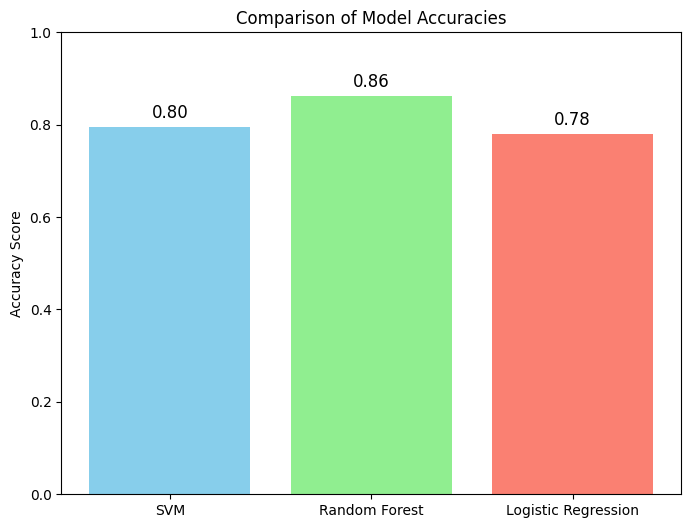

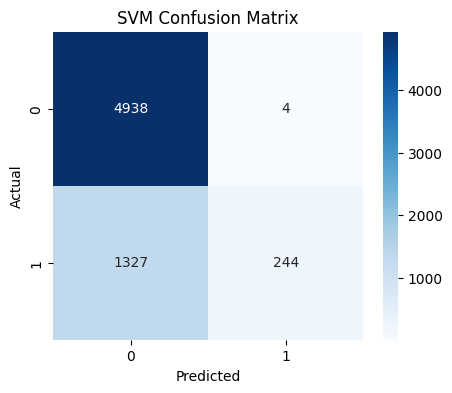

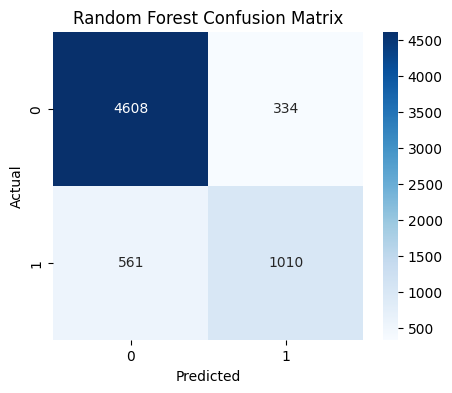

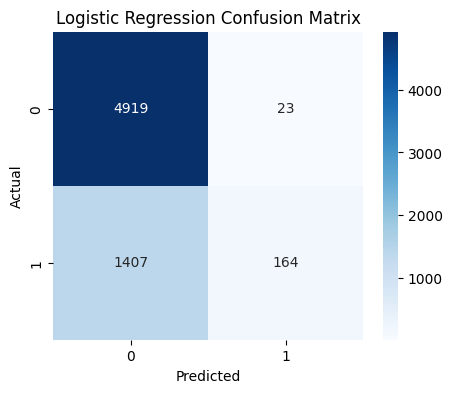

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Function to plot confusion matrix
def plot_cm(cm, title):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# ✅ Get confusion matrix for each model
cm_svm = confusion_matrix(Y_test, svm_predictions)
cm_rf = confusion_matrix(Y_test, rf_predictions)
cm_logreg = confusion_matrix(Y_test, logreg_predictions)

# ✅ Plot them one by one
plot_cm(cm_svm, "SVM Confusion Matrix")
plot_cm(cm_rf, "Random Forest Confusion Matrix")
plot_cm(cm_logreg, "Logistic Regression Confusion Matrix")


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Smaller grid for Random Forest
rf_param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
}

# Base model
rf = RandomForestClassifier()

# Randomized Search for Random Forest only
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=rf_param_dist,
                               n_iter=5,
                               cv=3,
                               verbose=2,
                               random_state=42,
                               n_jobs=-1)

# Use small sample
X_train_sub = X_train.sample(frac=0.3, random_state=42)
Y_train_sub = Y_train.loc[X_train_sub.index]

# Fit
rf_random.fit(X_train_sub, Y_train_sub)

print("\n=== Best Random Forest Hyperparameters ===")
print(rf_random.best_params_)
print(f"Best CV Score: {rf_random.best_score_:.2f}")


Fitting 3 folds for each of 5 candidates, totalling 15 fits

=== Best Random Forest Hyperparameters ===
{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 10}
Best CV Score: 0.86


In [ ]:
# Get the best Random Forest model from RandomizedSearchCV
best_rf = rf_random.best_estimator_

# Train it on the full training data
best_rf.fit(X_train, Y_train)


RandomForestClassifier(max_depth=10)

In [ ]:
import pandas as pd

# ✅ Pick any row — here, the first row
single_input = df.iloc[0].copy()  # safer with .copy()

print("Original Input:")
print(single_input)

# ✅ Drop the target label
single_features = single_input.drop('income')

# ✅ Make it a DataFrame
single_features = pd.DataFrame([single_features])

# ✅ One-hot encode
single_features = pd.get_dummies(single_features)

# ✅ Align columns with X_train (important!)
single_features = single_features.reindex(columns=X_train.columns, fill_value=0)

# ✅ Predict with the trained best RF
predicted_income = best_rf.predict(single_features)

print("\nPredicted Income:", predicted_income[0])


Original Input:
age                                                    39
worktype                                        State-gov
fnlwt                                               77516
education                                       Bachelors
education_number                                       13
marital_status                              Never-married
occupation                                   Adm-clerical
relatioship_status                          Not-in-family
race                                                White
sex                                                  Male
capital_gain                                         2174
capital_loss                                            0
hours_per_week                                         40
native_country                              United-States
income                                              <=50K
', '', '', '', 'hours_per_week', '', ''               NaN
Name: 0, dtype: object

Predicted Income:  <=50K
